## Ejercicio 1: Análisis Exploratorio de Datos

### Analiza los datos y la descripción de las clases del archivo bottle.csv. Utiliza las siguientes funciones y tareas para explorar y limpiar el conjunto de datos:
1. Obtén el conjunto de datos CalCofi desde https://www.kaggle.com/datasets/sohier/calcofi.
2. Trabaja con los datos del archivo bottle.csv.
3. Utiliza Julia para limpiar los datos (ver abajo).
4. Utiliza Julia para realizar la lista de tareas de Análisis Exploratorio de Datos (EDA) mencionadas a continuación.
5. Genera un informe mostrando tu código y los resultados obtenidos.
6. Entrega tu proyecto siguiendo las directrices de entrega establecidas.

* dataShape: Obtén la forma (dimensiones) del conjunto de datos.
* dataType: Identifica el tipo de datos de cada columna en el conjunto de datos.
* count_missing(col): Cuenta el número de valores faltantes en una columna específica.
* dataMissingPercentage(): Calcula el porcentaje de valores faltantes en cada columna.
* deleteColumns(threshold): Elimina todas las columnas cuyo porcentaje de valores faltantes sea inferior al umbral dado.
* calculateCorrelation(): Genera una matriz de correlación entre las columnas.
* displayCorrelation(): Muestra la matriz de correlación en forma de mapa de calor (heatmap).
* removeOutliersIQR(): Utilizando el rango intercuartílico (IQR), elimina todos los valores atípicos de las columnas numéricas.
* deleteRow(column): Elimina todas las filas con valores nulos en una columna específica.
* filterColumnsByCorrelation(target, threshold, relation): Filtra y elimina las columnas basándose en un umbral de correlación respecto a una columna objetivo y una relación especificada.
* describe(): Describe los datos, proporcionando métricas básicas como la media, mediana, desviación estándar y rangos para cada columna.

In [1]:
using DataFrames
using CSV
using Plots
using Statistics

In [2]:
datos = DataFrame(CSV.read("bottle.csv", DataFrame))
#Imprimir la forma de los datos
function dataShape(data::DataFrame)
    println("LA FORMA DE LOS DATOS ES DE: $(size(data))") 
end
dataShape(datos);

LA FORMA DE LOS DATOS ES DE: (864863, 74)


In [3]:
#Tipo de datos de cada columna
@show(describe(datos));

describe(datos) = 74×7 DataFrame
 Row │ variable             mean       min                                median    max                                nmissing  eltype
     │ Symbol               Union…     Any                                Union…    Any                                Int64     Type
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Cst_Cnt              17138.8    1                                  16848.0   34404                                     0  Int64
   2 │ Btl_Cnt              432432.0   1                                  432432.0  864863                                    0  Int64
   3 │ Sta_ID                          001.0 168.0                                  176.7 030.0                               0  String15
   4 │ Depth_ID                        19-4903CR-HY-060-0930-05400560-0…            20-1611SR-PR-324-1700-07670700-0…         0  Strin

In [4]:
@show(names(datos));

names(datos) = ["Cst_Cnt", "Btl_Cnt", "Sta_ID", "Depth_ID", "Depthm", "T_degC", "Salnty", "O2ml_L", "STheta", "O2Sat", "Oxy_µmol/Kg", "BtlNum", "RecInd", "T_prec", "T_qual", "S_prec", "S_qual", "P_qual", "O_qual", "SThtaq", "O2Satq", "ChlorA", "Chlqua", "Phaeop", "Phaqua", "PO4uM", "PO4q", "SiO3uM", "SiO3qu", "NO2uM", "NO2q", "NO3uM", "NO3q", "NH3uM", "NH3q", "C14As1", "C14A1p", "C14A1q", "C14As2", "C14A2p", "C14A2q", "DarkAs", "DarkAp", "DarkAq", "MeanAs", "MeanAp", "MeanAq", "IncTim", "LightP", "R_Depth", "R_TEMP", "R_POTEMP", "R_SALINITY", "R_SIGMA", "R_SVA", "R_DYNHT", "R_O2", "R_O2Sat", "R_SIO3", "R_PO4", "R_NO3", "R_NO2", "R_NH4", "R_CHLA", "R_PHAEO", "R_PRES", "R_SAMP", "DIC1", "DIC2", "TA1", "TA2", "pH2", "pH1", "DIC Quality Comment"]


In [5]:
function dataType(data::DataFrame)
    println("Tipo de datos de cada columna:")
    for (nombre, columna) in zip(names(data), eachcol(data))
        println(lpad(nombre, 30), " | ", eltype(columna))
    end
end    

dataType(datos);

Tipo de datos de cada columna:
                       Cst_Cnt | Int64
                       Btl_Cnt | Int64
                        Sta_ID | String15
                      Depth_ID | String
                        Depthm | Int64
                        T_degC | Union{Missing, Float64}
                        Salnty | Union{Missing, Float64}
                        O2ml_L | Union{Missing, Float64}
                        STheta | Union{Missing, Float64}
                         O2Sat | Union{Missing, Float64}
                   Oxy_µmol/Kg | Union{Missing, Float64}
                        BtlNum | Union{Missing, Int64}
                        RecInd | Int64
                        T_prec | Union{Missing, Int64}
                        T_qual | Union{Missing, Int64}
                        S_prec | Union{Missing, Int64}
                        S_qual | Union{Missing, Int64}
                        P_qual | Union{Missing, Int64}
                        O_qual | Union{Missing, Int64}
    

In [6]:
#Cuenta el número de valores faltantes en una columna específica
function count_missing(col::String, data::DataFrame)
    println("Número de valores faltantes en la columna", col, ":")
    println(count(ismissing, data[:,col])," datos faltantes de un total de ", length(data[:,1]))    
end

count_missing("DIC2", datos)

Número de valores faltantes en la columnaDIC2:
864639 datos faltantes de un total de 864863


In [7]:
#Porcentaje de datos faltantes de cada columna
function dataMissingPercentage(data::DataFrame)
    # Crear un vector de tuplas (nombre, porcentaje de datos faltantes)
    missing_data = []
    
    # Calcular el porcentaje de datos faltantes para cada columna
    for (nombre, columna) in zip(names(data), eachcol(data))
        porcentaje_faltante = 100 * count(ismissing, columna) / length(data[:, 1])
        push!(missing_data, (nombre, porcentaje_faltante))
    end
    
    # Ordenar de mayor a menor porcentaje de datos faltantes
    sorted_missing_data = sort(missing_data, by = x -> -x[2])
    
    # Imprimir los resultados
    println("PORCENTAJE DE DATOS FALTANTES EN CADA COLUMNA (del mayor al menor):")
    for (nombre, porcentaje) in sorted_missing_data
        println("$nombre | $porcentaje%")
    end
end

dataMissingPercentage(datos)

PORCENTAJE DE DATOS FALTANTES EN CADA COLUMNA (del mayor al menor):
pH2 | 99.99884374750683%
DIC Quality Comment | 99.99364061128757%
pH1 | 99.99028747905737%
DIC2 | 99.97409994415301%
TA2 | 99.97294369165984%
DIC1 | 99.76886512661542%
TA1 | 99.75903698042349%
C14A2p | 98.5267030732035%
C14A1p | 98.5246218187158%
C14As2 | 98.33337765634558%
C14As1 | 98.33129640185787%
IncTim | 98.33071827561128%
LightP | 97.84347347498968%
DarkAp | 97.63465427472327%
MeanAp | 97.63465427472327%
DarkAs | 97.38120372822054%
MeanAs | 97.38108810297122%
T_qual | 97.32593485904704%
NH3uM | 92.4887525538727%
R_NH4 | 92.48644004888635%
SThtaq | 92.3891992142108%
S_qual | 91.33805007267047%
BtlNum | 86.27909853930622%
R_SAMP | 85.89302583183695%
O_qual | 78.64679145714408%
O2Satq | 74.81716757451758%
Phaeop | 73.95298446112274%
ChlorA | 73.95286883587343%
R_PHAEO | 73.95252196012548%
R_CHLA | 73.95240633487616%
NO3uM | 60.987694004715195%
R_NO3 | 60.98676900272066%
NO2uM | 60.967690836583365%
R_NO2 | 60.966765

In [8]:
#Eliminar las columnas con más del 30% de datos faltantes
function deleteColumns(threshold::Number, data::DataFrame)
    # Crear un vector con los nombres de las columnas a eliminar
    columns_to_delete = []
    
    # Calcular el porcentaje de datos faltantes para cada columna
    for (nombre, columna) in zip(names(data), eachcol(data))
        porcentaje_faltante = 100 * count(ismissing, columna) / length(data[:, 1])
        if porcentaje_faltante > threshold
            push!(columns_to_delete, nombre)
        end
    end
    
    # Si hay columnas a eliminar, proceder con la eliminación
    if !isempty(columns_to_delete)
        select!(data, Not(columns_to_delete))
        println("Las columnas con más del $threshold% de datos faltantes han sido eliminadas.")
        println("Las columnas eliminadas son ", length(columns_to_delete),":")
        println(columns_to_delete)
    else
        println("No se eliminaron columnas, ya que ninguna supera el umbral de $threshold%.")
    end
end


deleteColumns (generic function with 1 method)

In [9]:
deleteColumns(30, datos);

Las columnas con más del 30% de datos faltantes han sido eliminadas.
Las columnas eliminadas son 42:
Any["BtlNum", "T_qual", "S_qual", "O_qual", "SThtaq", "O2Satq", "ChlorA", "Phaeop", "PO4uM", "PO4q", "SiO3uM", "SiO3qu", "NO2uM", "NO2q", "NO3uM", "NO3q", "NH3uM", "C14As1", "C14A1p", "C14As2", "C14A2p", "DarkAs", "DarkAp", "MeanAs", "MeanAp", "IncTim", "LightP", "R_SIO3", "R_PO4", "R_NO3", "R_NO2", "R_NH4", "R_CHLA", "R_PHAEO", "R_SAMP", "DIC1", "DIC2", "TA1", "TA2", "pH2", "pH1", "DIC Quality Comment"]


In [10]:
dataShape(datos)
dataMissingPercentage(datos);

LA FORMA DE LOS DATOS ES DE: (864863, 32)
PORCENTAJE DE DATOS FALTANTES EN CADA COLUMNA (del mayor al menor):
Chlqua | 26.096271895086275%
Phaqua | 26.095809394089006%
Oxy_µmol/Kg | 23.54072263468318%
O2Sat | 23.54002888318728%
R_O2Sat | 22.941783843221412%
P_qual | 22.096910146462502%
O2ml_L | 19.501585800294382%
R_O2 | 19.501585800294382%
NH3q | 6.540226602363611%
R_SIGMA | 6.111488177896383%
R_SVA | 6.101660031704443%
STheta | 6.092178761260454%
Salnty | 5.475318056154559%
S_prec | 5.475318056154559%
R_SALINITY | 5.475318056154559%
R_DYNHT | 5.394727257380649%
R_POTEMP | 5.324195855297313%
MeanAq | 2.824031089317036%
DarkAq | 2.8239154640677193%
C14A1q | 1.879835303394873%
C14A2q | 1.877754048907168%
T_degC | 1.2675996082616554%
T_prec | 1.2675996082616554%
R_TEMP | 1.2675996082616554%
Cst_Cnt | 0.0%
Btl_Cnt | 0.0%
Sta_ID | 0.0%
Depth_ID | 0.0%
Depthm | 0.0%
RecInd | 0.0%
R_Depth | 0.0%
R_PRES | 0.0%


In [11]:
#Genera una matriz de correlación entre las columnas
function calculateCorrelation(data::DataFrame)
    # Seleccionar los nombres de las columnas numéricas
    numeric_columnas = filter(col -> eltype(data[!, col]) <: Number, names(data))
    
    # Verificar si hay columnas numéricas
    if isempty(numeric_columnas)
        println("No hay columnas numéricas en el DataFrame.")
        return
    end
    
    # Seleccionar las columnas numéricas y calcular la matriz de correlación
    numeric_data = select(data, numeric_columnas)
    corr_matriz = cor(Matrix(numeric_data), dims=1)
    
    return corr_matriz, numeric_columnas
end


calculateCorrelation (generic function with 1 method)

In [12]:
matriz_corr, etiquetas = calculateCorrelation(datos)
matriz_corr

6×6 Matrix{Float64}:
  1.0        0.999345  -0.162222   -0.100142   -0.16222    -0.161961
  0.999345   1.0       -0.161617   -0.100828   -0.161614   -0.161348
 -0.162222  -0.161617   1.0         0.0823158   1.0         0.999994
 -0.100142  -0.100828   0.0823158   1.0         0.0823171   0.0821835
 -0.16222   -0.161614   1.0         0.0823171   1.0         0.999994
 -0.161961  -0.161348   0.999994    0.0821835   0.999994    1.0

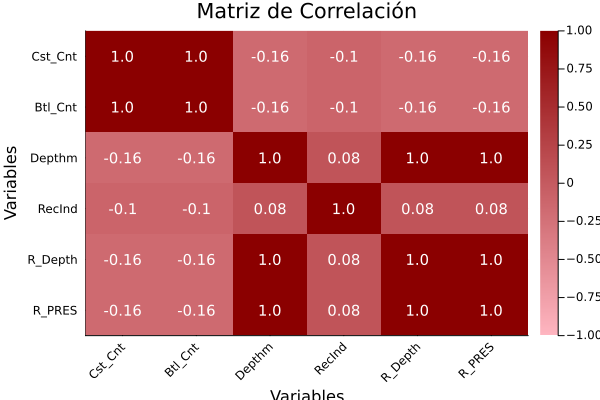

In [13]:
# Mapa de calor de la matriz de correlación con anotaciones y orientación correcta
function displayCorrelation(corr_matrix::Matrix, etiqueta::Vector{String})
    num_columns = size(corr_matrix, 1)
    labels = etiqueta  # Etiquetas como "Var1", "Var2", etc.

    # Invertir el orden de las filas de la matriz
    flipped_corr_matrix = reverse(corr_matrix, dims=1)

    # Crear el heatmap con la matriz invertida
    plt = Plots.heatmap(
        flipped_corr_matrix,
        title="Matriz de Correlación",   # Título del gráfico
        xlabel="Variables",              # Etiqueta del eje X
        ylabel="Variables",              # Etiqueta del eje Y
        xticks=(1:num_columns, labels),  # Etiquetas del eje X
        yticks=(1:num_columns, reverse(labels)),  # Etiquetas del eje Y, invertidas
        color=:reds,                  # Paleta de colores
        clim=(-1, 1),                    # Rango de la correlación (-1 a 1)
        xrotation=45                     # Rotación de etiquetas en el eje X
    )

    # Agregar anotaciones con los valores
    for i in 1:num_columns
        for j in 1:num_columns
            Plots.annotate!(plt, j, num_columns - i + 1, text(round(corr_matrix[i, j], digits=2), :white, 10))
        end
    end

    # Mostrar el gráfico
    Plots.display(plt)
end

displayCorrelation(matriz_corr, etiquetas)

In [14]:
#Utilizando el rango intercuartílico (IQR), elimina todos los valores atípicos de las columnas numéricas
function removeOutliersIQR!(df::DataFrame)
    # Identificar las columnas numéricas (Float64 o Int)
    numeric_cols = names(df)[map(eltype, eachcol(df)) .== Float64 .|| map(eltype, eachcol(df)) .== Int]

    for col in numeric_cols
        # Calcular Q1, Q3 e IQR
        q1, q3 = quantile(df[!, col], [0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Filtrar las filas dentro de los límites en el lugar
        filter!(row -> row[col] ≥ lower_bound && row[col] ≤ upper_bound, df)
    end

    return df
end

removeOutliersIQR! (generic function with 1 method)

In [15]:
#Elimina todas las filas con valores nulos en una columna específica.
function deleteRow(df::DataFrame, column::String)
    # Filtrar las filas en el lugar
    d = filter!(row -> !ismissing(row[column]), df)
end

deleteRow (generic function with 1 method)

In [16]:
#obtener el nombre de todas las columnas con datos faltantes
col_datos_faltantes = [nombre for nombre in names(datos) if any(ismissing, datos[!, nombre])]

24-element Vector{String}:
 "T_degC"
 "Salnty"
 "O2ml_L"
 "STheta"
 "O2Sat"
 "Oxy_µmol/Kg"
 "T_prec"
 "S_prec"
 "P_qual"
 "Chlqua"
 ⋮
 "MeanAq"
 "R_TEMP"
 "R_POTEMP"
 "R_SALINITY"
 "R_SIGMA"
 "R_SVA"
 "R_DYNHT"
 "R_O2"
 "R_O2Sat"

In [17]:
#Eliminar las columnas de los datos faltantes
for i in col_datos_faltantes
    deleteRow(datos, i)
end

In [18]:
#Cambiar el tipo de dato de las columnas con datos faltantes
for col in names(datos)
    # Verificar si la columna tiene valores del tipo Union{Missing, T}
    if eltype(datos[!, col]) <: Union{Missing, T} where T
        disallowmissing!(datos, col)
    end
end

#tipo de los datos
dataType(datos);

Tipo de datos de cada columna:
                       Cst_Cnt | Int64
                       Btl_Cnt | Int64
                        Sta_ID | String15
                      Depth_ID | String
                        Depthm | Int64
                        T_degC | Float64
                        Salnty | Float64
                        O2ml_L | Float64
                        STheta | Float64
                         O2Sat | Float64
                   Oxy_µmol/Kg | Float64
                        RecInd | Int64
                        T_prec | Int64
                        S_prec | Int64
                        P_qual | Int64
                        Chlqua | Int64
                        Phaqua | Int64
                          NH3q | Int64
                        C14A1q | Int64
                        C14A2q | Int64
                        DarkAq | Int64
                        MeanAq | Int64
                       R_Depth | Float64
                        R_TEMP | Float64
             

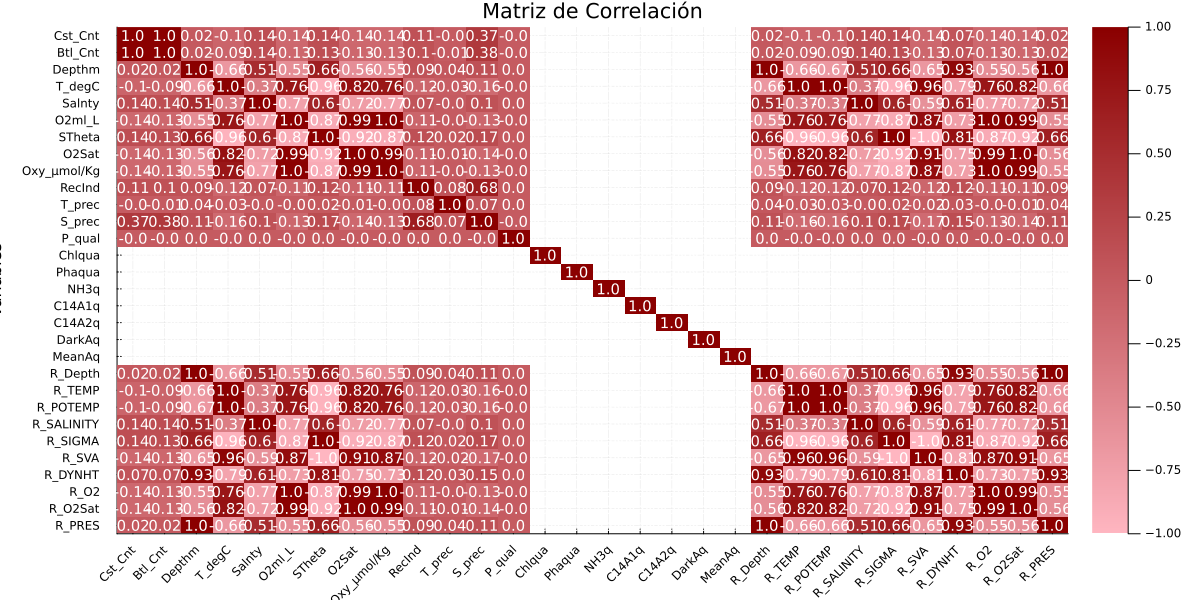

In [19]:
matriz_corr, etiquetas = calculateCorrelation(datos)

Plots.default(size=(1200, 600))
displayCorrelation(matriz_corr, etiquetas)

In [20]:
matriz_corr

30×30 Matrix{Float64}:
  1.0         0.998806    0.0199649  …  -0.137842  -0.14081    0.0197845
  0.998806    1.0         0.0158991     -0.129955  -0.132656   0.0157444
  0.0199649   0.0158991   1.0           -0.547396  -0.560025   0.999994
 -0.102716   -0.0938704  -0.66297        0.758451   0.820706  -0.661526
  0.144338    0.141339    0.51302       -0.768523  -0.721631   0.511861
 -0.137842   -0.129955   -0.547396   …   1.0        0.992483  -0.545506
  0.140061    0.132145    0.662606      -0.871434  -0.915421   0.661016
 -0.14081    -0.132656   -0.560025       0.992483   1.0       -0.558185
 -0.137953   -0.130066   -0.547533       0.999999   0.992613  -0.545643
  0.110132    0.10388     0.0895054     -0.107968  -0.111589   0.0892453
  ⋮                                  ⋱                        
 -0.102716   -0.0938704  -0.66297        0.758451   0.820706  -0.661526
 -0.102591   -0.0937562  -0.666242       0.758961   0.821035  -0.664803
  0.144302    0.141303    0.513021      -0.7685

In [25]:
function filterColumnsByCorrelation(df::DataFrame, matriz_correlacion::Matrix{Float64}, columna_objetivo::String, umbral::Float64)
    # Obtener los nombres de las columnas
    nombres_columnas = names(df)
    
    # Obtener el índice de la columna objetivo
    indice_columna_objetivo = findfirst(==(columna_objetivo), nombres_columnas)

    # Obtener la fila correspondiente a la columna objetivo en la matriz de correlación y calcular el valor absoluto
    correlaciones_objetivo = abs.(matriz_correlacion[indice_columna_objetivo, :])
    
    # Filtrar las columnas cuyos valores absolutos de correlación sean mayores o iguales al umbral
    indices_seleccionados = findall(correlaciones_objetivo .>= umbral)

    # Seleccionar las columnas en función de los índices
    columnas_seleccionadas = nombres_columnas[indices_seleccionados]

    # Eliminar las columnas que no están en la lista de seleccionadas
    select!(df, columnas_seleccionadas)
    
    return df
end

filterColumnsByCorrelation (generic function with 1 method)

In [26]:
filterColumnsByCorrelation(datos, matriz_corr, "T_degC", 0.3)

380282×17 DataFrame
    Row │ Sta_ID       Depth_ID                           Depthm  T_degC   Sal ⋯
        │ String15     String                             Int64   Float64  Flo ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…       0    10.3    33 ⋯
      2 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      10    10.29   32
      3 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      15    10.29   32
      4 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      20    10.33   33
      5 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      30    10.39   33 ⋯
      6 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      31    10.4    33
      7 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      47    10.36   33
      8 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      50    10.35   33
   ⋮    │      ⋮                       ⋮                    ⋮        ⋮         ⋱
 380276 │ 070.0 060.0  20-1101NM-MX-031-1116-07000600-0…     500     5.93   34 ⋯
 380277 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     200     8.38   34
 380278 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     250     7.83   34
 380279 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     300     7.09   34
 380280 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     400     6.5    34 ⋯
 380281 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     500     5.84   34
 380282 │ 093.3 028.0  20-1207OS-MX-185-1506-09330280-0…       0    18.05   33
                                              13 columns and 380267 rows omitted

In [27]:
matriz_corr, etiquetas = calculateCorrelation(datos)
matriz_corr

15×15 Matrix{Float64}:
   1.0        -0.66297     0.51302   …   -0.654234    0.926386   -0.547396
  -0.66297     1.0        -0.372376       0.959971   -0.791971    0.758451
   0.51302    -0.372376    1.0           -0.592698    0.610088   -0.768523
  -0.547396    0.758451   -0.768523       0.868156   -0.73369     1.0
   0.662606   -0.95917     0.598843      -0.999861    0.813578   -0.871434
 NaN         NaN         NaN         …  NaN         NaN         NaN
 NaN         NaN         NaN            NaN         NaN         NaN
   1.0        -0.66297     0.51302       -0.654234    0.926386   -0.547396
  -0.66297     1.0        -0.372376       0.959971   -0.791971    0.758451
  -0.666242    0.99999    -0.374246       0.960192   -0.794421    0.758961
   0.513021   -0.372369    1.0       …   -0.592692    0.610087   -0.768516
   0.662595   -0.959167    0.598839      -0.999857    0.813571   -0.871436
  -0.654234    0.959971   -0.592698       1.0        -0.805212    0.868156
   0.926386   -0.7919

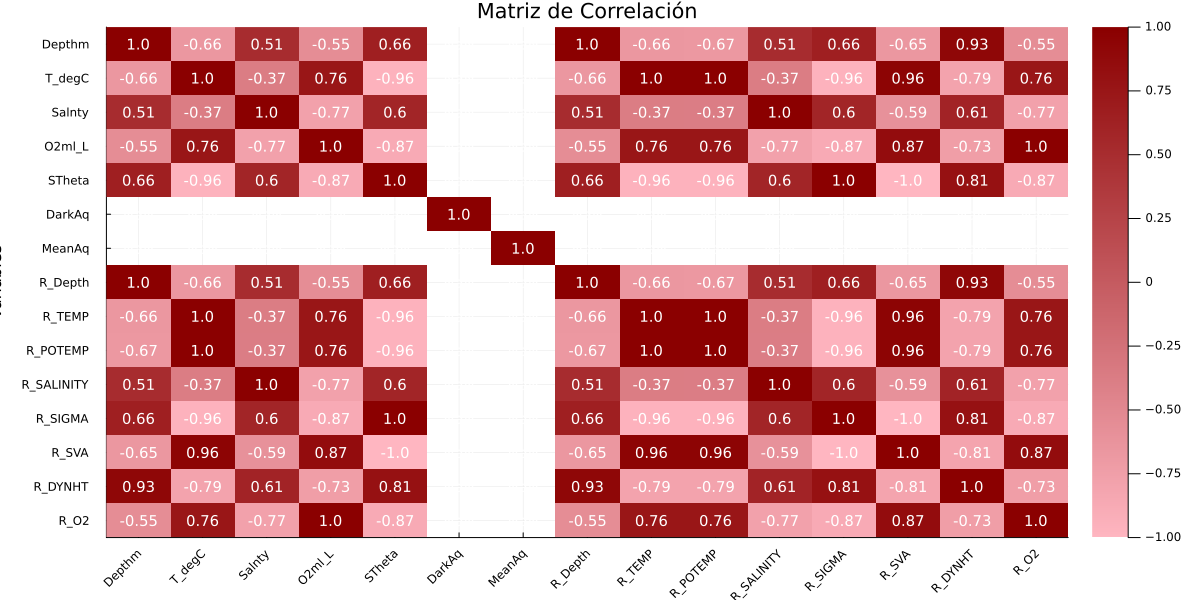

In [28]:
displayCorrelation(matriz_corr, etiquetas)

In [32]:
@show(describe(datos));

describe(datos) = 17×7 DataFrame
 Row │ variable    mean      min                                median  max                                nmissing  eltype
     │ Symbol      Union…    Any                                Union…  Any                                Int64     DataType
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Sta_ID                001.0 168.0                                176.7 030.0                               0  String15
   2 │ Depth_ID              19-4904CR-HY-087-0606-04400485-0…          20-1207OS-MX-185-1506-09330280-0…         0  String
   3 │ Depthm      277.858   0                                  176.0   5351                                      0  Int64
   4 │ T_degC      10.3194   1.44                               9.33    31.14                                     0  Float64
   5 │ Salnty      33.9723   29.402                             34.039  36.615              

In [34]:
#eliminamos las columnas DarkAq y MeanAq ya que solo contienen el mismo valor constante de 9
datos = select!(datos, Not(["DarkAq", "MeanAq"]))

380282×15 DataFrame
    Row │ Sta_ID       Depth_ID                           Depthm  T_degC   Sal ⋯
        │ String15     String                             Int64   Float64  Flo ⋯
────────┼───────────────────────────────────────────────────────────────────────
      1 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…       0    10.3    33 ⋯
      2 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      10    10.29   32
      3 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      15    10.29   32
      4 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      20    10.33   33
      5 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      30    10.39   33 ⋯
      6 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      31    10.4    33
      7 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      47    10.36   33
      8 │ 044.0 048.5  19-4904CR-HY-087-0606-04400485-0…      50    10.35   33
   ⋮    │      ⋮                       ⋮                    ⋮        ⋮         ⋱
 380276 │ 070.0 060.0  20-1101NM-MX-031-1116-07000600-0…     500     5.93   34 ⋯
 380277 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     200     8.38   34
 380278 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     250     7.83   34
 380279 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     300     7.09   34
 380280 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     400     6.5    34 ⋯
 380281 │ 070.0 070.0  20-1101NM-MX-031-0427-07000700-0…     500     5.84   34
 380282 │ 093.3 028.0  20-1207OS-MX-185-1506-09330280-0…       0    18.05   33
                                              11 columns and 380267 rows omitted

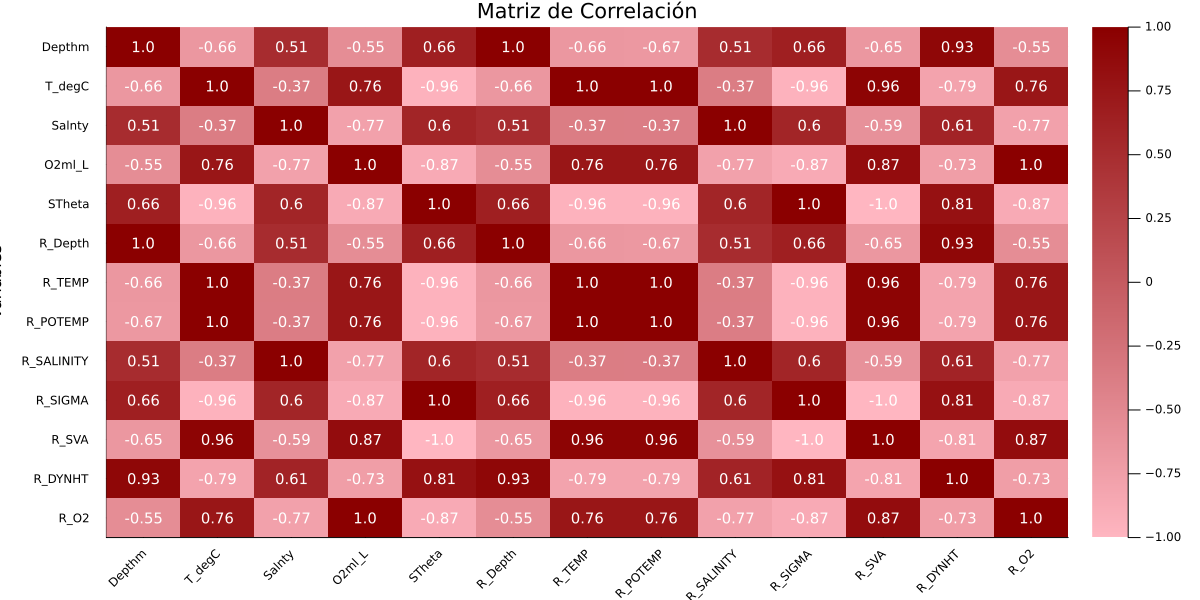

In [35]:
matriz_corr, etiquetas = calculateCorrelation(datos)
displayCorrelation(matriz_corr, etiquetas)

In [36]:
#describe para describir los datos de cada columna
@show(describe(datos));

describe(datos) = 15×7 DataFrame
 Row │ variable    mean      min                                median  max                                nmissing  eltype
     │ Symbol      Union…    Any                                Union…  Any                                Int64     DataType
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Sta_ID                001.0 168.0                                176.7 030.0                               0  String15
   2 │ Depth_ID              19-4904CR-HY-087-0606-04400485-0…          20-1207OS-MX-185-1506-09330280-0…         0  String
   3 │ Depthm      277.858   0                                  176.0   5351                                      0  Int64
   4 │ T_degC      10.3194   1.44                               9.33    31.14                                     0  Float64
   5 │ Salnty      33.9723   29.402                             34.039  36.615              